# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [4]:
sinasc_raw.drop_duplicates(inplace=True)
sinasc_raw.shape

(27028, 69)

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
sinasc_raw['munResLat']

0       -11.93554
1       -11.93554
2       -11.93554
3       -12.13178
4       -11.93554
           ...   
27023   -12.74137
27024   -12.55684
27025   -12.74137
27026   -12.74137
27027   -11.70974
Name: munResLat, Length: 27028, dtype: float64

In [6]:
sinasc_raw.loc[sinasc_raw['munResLat'] >= -10.5, 'munResLat_cat'] = 'acima de -10.5'
sinasc_raw.loc[sinasc_raw['munResLat'] < -10.5, 'munResLat_cat'] = 'abaixo de -10.5'
sinasc_raw['munResLat_cat']

0        abaixo de -10.5
1        abaixo de -10.5
2        abaixo de -10.5
3        abaixo de -10.5
4        abaixo de -10.5
              ...       
27023    abaixo de -10.5
27024    abaixo de -10.5
27025    abaixo de -10.5
27026    abaixo de -10.5
27027    abaixo de -10.5
Name: munResLat_cat, Length: 27028, dtype: object

In [7]:
sinasc_raw['munResLat_cat'].value_counts()

acima de -10.5     14034
abaixo de -10.5    12993
Name: munResLat_cat, dtype: int64

In [8]:
sinasc_1 = sinasc_raw[['munResLat_cat','PESO','APGAR1']]
sinasc_1

,munResLat_cat,PESO,APGAR1
0,abaixo de -10.5,3685,9.0
1,abaixo de -10.5,3055,8.0
2,abaixo de -10.5,3460,8.0
3,abaixo de -10.5,2982,9.0
4,abaixo de -10.5,3310,8.0
...,...,...,...
27023,abaixo de -10.5,2110,8.0
27024,abaixo de -10.5,3310,8.0
27025,abaixo de -10.5,3065,9.0
27026,abaixo de -10.5,2352,8.0


In [9]:
sinasc_1.groupby(['munResLat_cat']).agg([('soma','sum'),
                                         ('média','mean'),
                                         'min','max',
                                         ('mediana','median'),
                                         ('desvio padrão','std')])

PESO                                                \
                     soma        média  min   max mediana desvio padrão   
munResLat_cat                                                             
abaixo de -10.5  42098594  3240.098053  258  5985  3270.0    531.815114   
acima de -10.5   45555148  3246.055864  295  5190  3275.0    556.487709   

                   APGAR1                                             
                     soma     média  min   max mediana desvio padrão  
munResLat_cat                                                         
abaixo de -10.5  104590.0  8.070216  0.0  10.0     8.0      0.960767  
acima de -10.5   114559.0  8.199771  0.0  10.0     8.0      1.002839

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [10]:
sinasc_raw.loc[sinasc_raw['munResArea'] >= 3000, 'munResArea_cat'] = 'acima de 3000'
sinasc_raw.loc[sinasc_raw['munResArea'] < 3000, 'munResArea_cat'] = 'abaixo de 3000'

sinasc_2 = sinasc_raw[['munResArea_cat','IDADEMAE','QTDFILVIVO']]

sinasc_2.groupby(['munResArea_cat']).agg([('soma','sum'),
                                         ('média','mean'),
                                         'min','max',
                                         ('mediana','median'),
                                         ('desvio padrão','std')])

IDADEMAE                                          QTDFILVIVO  \
                   soma      média min max mediana desvio padrão       soma   
munResArea_cat                                                                
abaixo de 3000   137389  26.324775  11  53    26.0      6.305535     4773.0   
acima de 3000    567848  26.038518  12  53    25.0      6.405497    22053.0   

                                                           
                   média  min   max mediana desvio padrão  
munResArea_cat                                             
abaixo de 3000  0.924284  0.0  30.0     1.0      1.075442  
acima de 3000   1.086890  0.0  14.0     1.0      1.191750

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
sinasc_raw.loc[sinasc_raw['munResAlt'] >= 250, 'munResAlt_cat'] = 'acima de 250'
sinasc_raw.loc[sinasc_raw['munResAlt'] < 250, 'munResAlt_cat'] = 'abaixo de 250'

sinasc_3 = sinasc_raw[['munResAlt_cat','IDADEMAE','QTDFILVIVO']]

sinasc_3.groupby(['munResAlt_cat']).agg([('soma','sum'),
                                         ('média','mean'),
                                         'min','max',
                                         ('mediana','median'),
                                         ('desvio padrão','std')])

IDADEMAE                                          QTDFILVIVO  \
                  soma      média min max mediana desvio padrão       soma   
munResAlt_cat                                                                
abaixo de 250   587483  26.048996  11  52    25.0      6.392912    22492.0   
acima de 250    117754  26.319624  13  53    26.0      6.354230     4334.0   

                                                          
                  média  min   max mediana desvio padrão  
munResAlt_cat                                             
abaixo de 250  1.070334  0.0  14.0     1.0      1.177771  
acima de 250   0.976126  0.0  30.0     1.0      1.134706

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [12]:
sinasc_4a = sinasc_raw[['IDADEMAE','munResNome']]
sinasc_4a.groupby('munResNome').mean()

,IDADEMAE
munResNome,
Alta Floresta D'Oeste,25.991826
Alto Alegre dos Parecis,24.844156
Alto Paraíso,24.960177
Alvorada D'Oeste,25.770732
Ariquemes,25.607866
Buritis,25.559177
Cabixi,26.037500
Cacaulândia,25.546667
Cacoal,26.890102


In [13]:
sinasc_4b = sinasc_4a.set_index('munResNome')

In [14]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [18]:
sinasc_4b.groupby(imediatas).mean()

,IDADEMAE
munResNome,
Ariquemes,25.459635
Cacoal,26.347817
Jaru,25.708853
Ji-Paraná,26.094720
Porto Velho,26.166303
Vilhena,26.417143


<AxesSubplot:xlabel='munResNome'>

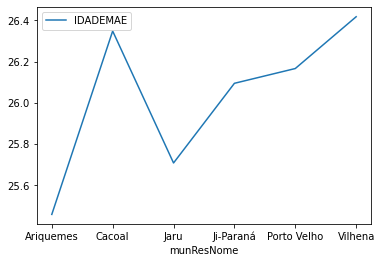

In [74]:
sinasc_4b.groupby(imediatas).mean().plot()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [40]:
sinasc_5 = sinasc_raw[['munResNome','IDADEMAE','IDADEPAI']]
sinasc_5.groupby('munResNome').mean()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.991826,29.548701
Alto Alegre dos Parecis,24.844156,29.179104
Alto Paraíso,24.960177,28.833333
Alvorada D'Oeste,25.770732,30.757282
Ariquemes,25.607866,32.466667
Buritis,25.559177,30.812500
Cabixi,26.037500,34.333333
Cacaulândia,25.546667,36.333333
Cacoal,26.890102,30.931854


In [41]:
sinasc_idh = sinasc_5.set_index('munResNome')

In [38]:
idh = {
    "Candeias do Jamari": "IDH médio",
    "Guajará-Mirim": "IDH médio",
    "Itapuã do Oeste": "IDH médio",
    "Nova Mamoré": "IDH baixo",
    "Porto Velho": "IDH alto",
    "Alto Paraíso": "IDH médio",
    "Ariquemes": "IDH alto",
    "Buritis": "IDH médio",
    "Cacaulândia": "IDH médio",
    "Campo Novo de Rondônia": "IDH baixo",
    "Cujubim": "IDH médio",
    "Monte Negro": "IDH médio",
    "Rio Crespo": "IDH médio",
    "Jaru": "IDH médio",
    "Governador Jorge Teixeira": "IDH baixo",
    "Machadinho D'Oeste": "IDH baixo",
    "Theobroma": "IDH baixo",
    "Vale do Anari": "IDH baixo",
    "Alvorada D'Oeste": "IDH médio",
    "Costa Marques": "IDH médio",
    "Ji-Paraná": "IDH alto",
    "Mirante da Serra": "IDH médio",
    "Nova União": "IDH baixo",
    "Ouro Preto do Oeste": "IDH médio",
    "Presidente Médici": "IDH médio",
    "São Francisco do Guaporé": "IDH médio",
    "São Miguel do Guaporé": "IDH médio",
    "Seringueiras": "IDH baixo",
    "Teixeirópolis": "IDH médio",
    "Urupá": "IDH médio",
    "Vale do Paraíso": "IDH médio",
    "Cacoal": "IDH alto",
    "Alta Floresta D'Oeste": "IDH médio",
    "Alto Alegre dos Parecis": "IDH baixo",
    "Castanheiras": "IDH médio",
    "Espigão D'Oeste": "IDH médio",
    "Ministro Andreazza": "IDH médio",
    "Nova Brasilândia D'Oeste": "IDH médio",
    "Novo Horizonte do Oeste": "IDH médio",
    "Parecis": "IDH médio",
    "Pimenta Bueno": "IDH alto",
    "Primavera de Rondônia": "IDH médio",
    "Rolim de Moura": "IDH alto",
    "Santa Luzia D'Oeste": "IDH médio",
    "São Felipe D'Oeste": "IDH médio",
    "Vilhena": "IDH alto",
    "Cabixi": "IDH médio",
    "Cerejeiras": "IDH médio",
    "Chupinguaia": "IDH médio",
    "Colorado do Oeste": "IDH médio",
    "Corumbiara": "IDH médio",
    "Pimenteiras do Oeste": "IDH médio"
}

In [55]:
sinasc_idh.groupby(idh).agg([('soma','sum'),
                             ('média','mean'),
                             'min','max',
                             ('mediana','median'),
                             ('desvio padrão','std')])

IDADEMAE                                           IDADEPAI  \
               soma      média min max mediana desvio padrão      soma   
munResNome                                                               
IDH alto     442955  26.280332  12  47    26.0      6.415374  140082.0   
IDH baixo     46247  25.326944  13  46    25.0      6.194908   13686.0   
IDH médio    216035  25.884855  11  53    25.0      6.353274   82730.0   

                                                         
                média   min   max mediana desvio padrão  
munResNome                                               
IDH alto    31.074091  15.0  70.0    30.0      7.773149  
IDH baixo   30.617450  16.0  58.0    30.0      7.417345  
IDH médio   31.207092  16.0  86.0    30.0      7.824859

In [66]:
sinasc_idh.groupby(idh).count()

,IDADEMAE,IDADEPAI
munResNome,,
IDH alto,16855,4508
IDH baixo,1826,447
IDH médio,8346,2651


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [43]:
sinasc_ifdm = sinasc_5.set_index('munResNome')

In [46]:
ifdm = {
    "Candeias do Jamari": "IFDM moderado",
    "Guajará-Mirim": "IFDM regular",
    "Itapuã do Oeste": "IFDM regular",
    "Nova Mamoré": "IFDM regular",
    "Porto Velho": "IFDM moderado",
    "Alto Paraíso": "IFDM regular",
    "Ariquemes": "IFDM moderado",
    "Buritis": "IFDM moderado",
    "Cacaulândia": "IFDM regular",
    "Campo Novo de Rondônia": "IFDM regular",
    "Cujubim": "IFDM regular",
    "Monte Negro": "IFDM moderado",
    "Rio Crespo": "IFDM moderado",
    "Jaru": "IFDM moderado",
    "Governador Jorge Teixeira": "IFDM regular",
    "Machadinho D'Oeste": "IFDM regular",
    "Theobroma": "IFDM regular",
    "Vale do Anari": "IFDM regular",
    "Alvorada D'Oeste": "IFDM regular",
    "Costa Marques": "IFDM regular",
    "Ji-Paraná": "IFDM moderado",
    "Mirante da Serra": "IFDM regular",
    "Nova União": "IFDM regular",
    "Ouro Preto do Oeste": "IFDM moderado",
    "Presidente Médici": "IFDM moderado",
    "São Francisco do Guaporé": "IFDM moderado",
    "São Miguel do Guaporé": "IFDM moderado",
    "Seringueiras": "IFDM regular",
    "Teixeirópolis": "IFDM moderado",
    "Urupá": "IFDM moderado",
    "Vale do Paraíso": "IFDM regular",
    "Cacoal": "IFDM moderado",
    "Alta Floresta D'Oeste": "IFDM moderado",
    "Alto Alegre dos Parecis": "IFDM regular",
    "Castanheiras": "IFDM regular",
    "Espigão D'Oeste": "IFDM regular",
    "Ministro Andreazza": "IFDM regular",
    "Nova Brasilândia D'Oeste": "IFDM regular",
    "Novo Horizonte do Oeste": "IFDM regular",
    "Parecis": "IFDM regular",
    "Pimenta Bueno": "IFDM moderado",
    "Primavera de Rondônia": "IFDM moderado",
    "Rolim de Moura": "IFDM moderado",
    "Santa Luzia D'Oeste": "IFDM regular",
    "São Felipe D'Oeste": "IFDM moderado",
    "Vilhena": "IFDM moderado",
    "Cabixi": "IFDM regular",
    "Cerejeiras": "IFDM moderado",
    "Chupinguaia": "IFDM moderado",
    "Colorado do Oeste": "IFDM moderado",
    "Corumbiara": "IFDM regular",
    "Pimenteiras do Oeste": "IFDM moderado"
}

In [56]:
sinasc_ifdm.groupby(ifdm).agg([('soma','sum'),
                             ('média','mean'),
                             'min','max',
                             ('mediana','median'),
                             ('desvio padrão','std')])

IDADEMAE                                           IDADEPAI  \
                  soma      média min max mediana desvio padrão      soma   
munResNome                                                                  
IFDM moderado   572907  26.223600  12  53    26.0      6.387846  190565.0   
IFDM regular    132330  25.546332  11  52    25.0      6.355982   45933.0   

                                                            
                   média   min   max mediana desvio padrão  
munResNome                                                  
IFDM moderado  31.067004  15.0  70.0    30.0      7.716773  
IFDM regular   31.204484  16.0  86.0    30.0      7.994621

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [48]:
sinasc_pib = sinasc_5.set_index('munResNome')

In [51]:
pib = {
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Porto Velho": "Acima de 1 Bilhão",
    "Alto Paraíso": "Acima de 300 Milhões",
    "Ariquemes": "Acima de 1 Bilhão",
    "Buritis": "Acima de 500 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Jaru": "Acima de 1 Bilhão",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Machadinho D'Oeste": "Acima de 500 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Alvorada D'Oeste": "Acima de 200 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Ji-Paraná": "Acima de 1 Bilhão",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacoal": "Acima de 1 Bilhão",
    "Alta Floresta D'Oeste": "Acima de 300 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Espigão D'Oeste": "Acima de 500 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Nova Brasilândia D'Oeste": "Acima de 300 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Pimenta Bueno": "Acima de 1 Bilhão",
    "Primavera de Rondônia": "Até 100 Milhões",
    "Rolim de Moura": "Acima de 1 Bilhão",
    "Santa Luzia D'Oeste": "Acima de 100 Milhões",
    "São Felipe D'Oeste": "Até 100 Milhões",
    "Vilhena": "Acima de 1 Bilhão",
    "Cabixi": "Acima de 100 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões"
}

In [57]:
sinasc_pib.groupby(pib).agg([('soma','sum'),
                             ('média','mean'),
                             'min','max',
                             ('mediana','median'),
                             ('desvio padrão','std')])

IDADEMAE                                           \
                         soma      média min max mediana desvio padrão   
munResNome                                                               
Acima de 1 Bilhão      465846  26.265562  12  47    26.0      6.403777   
Acima de 100 Milhões    50094  25.662910  12  52    25.0      6.306384   
Acima de 200 Milhões    18334  25.323204  13  44    25.0      6.064473   
Acima de 300 Milhões    48567  25.833511  11  53    25.0      6.273901   
Acima de 500 Milhões   110968  25.782528  13  53    25.0      6.469479   
Até 100 Milhões         11428  26.515081  14  41    26.0      5.925831   

                      IDADEPAI                                               
                          soma      média   min   max mediana desvio padrão  
munResNome                                                                   
Acima de 1 Bilhão     144654.0  31.108387  15.0  70.0    30.0      7.767477  
Acima de 100 Milhões   21047.0  31.602102  17.0  73.0    30.0      7.954339  
Acima de 200 Milhões    8964.0  30.386441  16.0  55.0    30.0      7.739365  
Acima de 300 Milhões   19257.0  30.183386  16.0  64.0    29.0      7.415833  
Acima de 500 Milhões   34048.0  31.322907  16.0  86.0    31.0      7.863105  
Até 100 Milhões         8528.0  31.585185  17.0  67.0    30.0      7.694333

In [68]:
sinasc_pib.groupby(pib).sum()

,IDADEMAE,IDADEPAI
munResNome,,
Acima de 1 Bilhão,465846,144654.0
Acima de 100 Milhões,50094,21047.0
Acima de 200 Milhões,18334,8964.0
Acima de 300 Milhões,48567,19257.0
Acima de 500 Milhões,110968,34048.0
Até 100 Milhões,11428,8528.0


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- A idade mediana dos pais dos bebês nascidos no ano de 2019 é igual (30 anos) para todas as faixas de IDH.
- Aproximadamente 60% dos nascimentos em 2019 ocorreram em municípios com IDH alto.